In [1]:
# Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparamter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/modified/train_preperation.csv')
test = pd.read_csv('../data/modified/test_preperation.csv')
ss = pd.read_csv('../data/raw/gender_submission.csv')

# Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project. 

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn [documentation](https://scikit-learn.org/stable/index.html) for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [3]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 12)
Y_train shape:  (881,)
X_test shape:  (418, 12)


## Fit model to data and make predictions

This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set. 

## Logistic regression

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.59

## Support vector machines

In [5]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

80.02

## K-nearest neighbours (KNN)

In [6]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.84

## Gaussian naive bayes

In [7]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.57

## Perceptron

In [8]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

71.28

## Linear SVC

In [9]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

## Stochastic gradient descent

In [10]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.48

## Decision tree

In [11]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.31

## Random forest

In [12]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.31

## CatBoost

In [13]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6867539	total: 55.9ms	remaining: 55.8s
1:	learn: 0.6814229	total: 57ms	remaining: 28.5s
2:	learn: 0.6776565	total: 58.3ms	remaining: 19.4s
3:	learn: 0.6713999	total: 59.9ms	remaining: 14.9s
4:	learn: 0.6658306	total: 61.2ms	remaining: 12.2s
5:	learn: 0.6608253	total: 62.5ms	remaining: 10.4s
6:	learn: 0.6561064	total: 64.1ms	remaining: 9.09s
7:	learn: 0.6511347	total: 65.2ms	remaining: 8.09s
8:	learn: 0.6468270	total: 66.2ms	remaining: 7.29s
9:	learn: 0.6413057	total: 67.8ms	remaining: 6.71s
10:	learn: 0.6358491	total: 69.3ms	remaining: 6.23s
11:	learn: 0.6305719	total: 70.8ms	remaining: 5.83s
12:	learn: 0.6257250	total: 72.3ms	remaining: 5.49s
13:	learn: 0.6213334	total: 73.7ms	remaining: 5.19s
14:	learn: 0.6166039	total: 75.2ms	remaining: 4.93s
15:	learn: 0.6121375	total: 76.6ms	remaining: 4.71s
16:	learn: 0.6074781	total: 78.2ms	remaining: 4.52s
17:	learn: 0.6029175	total: 79.6ms	remaining: 4.34s
18:	learn: 0.6001702	total: 80.6ms	remaining: 4

197:	learn: 0.4115377	total: 302ms	remaining: 1.22s
198:	learn: 0.4112405	total: 303ms	remaining: 1.22s
199:	learn: 0.4112014	total: 304ms	remaining: 1.21s
200:	learn: 0.4110121	total: 305ms	remaining: 1.21s
201:	learn: 0.4107865	total: 306ms	remaining: 1.21s
202:	learn: 0.4106736	total: 307ms	remaining: 1.21s
203:	learn: 0.4106380	total: 308ms	remaining: 1.2s
204:	learn: 0.4104413	total: 309ms	remaining: 1.2s
205:	learn: 0.4103984	total: 310ms	remaining: 1.19s
206:	learn: 0.4102305	total: 311ms	remaining: 1.19s
207:	learn: 0.4100245	total: 312ms	remaining: 1.19s
208:	learn: 0.4098563	total: 314ms	remaining: 1.19s
209:	learn: 0.4096862	total: 315ms	remaining: 1.18s
210:	learn: 0.4095093	total: 316ms	remaining: 1.18s
211:	learn: 0.4094839	total: 317ms	remaining: 1.18s
212:	learn: 0.4094137	total: 318ms	remaining: 1.17s
213:	learn: 0.4092167	total: 319ms	remaining: 1.17s
214:	learn: 0.4091299	total: 320ms	remaining: 1.17s
215:	learn: 0.4089693	total: 321ms	remaining: 1.17s
216:	learn: 0.

485:	learn: 0.3919826	total: 617ms	remaining: 653ms
486:	learn: 0.3919798	total: 618ms	remaining: 651ms
487:	learn: 0.3919275	total: 619ms	remaining: 649ms
488:	learn: 0.3918874	total: 620ms	remaining: 648ms
489:	learn: 0.3918765	total: 622ms	remaining: 647ms
490:	learn: 0.3918325	total: 623ms	remaining: 646ms
491:	learn: 0.3918044	total: 624ms	remaining: 644ms
492:	learn: 0.3917236	total: 625ms	remaining: 643ms
493:	learn: 0.3917235	total: 626ms	remaining: 641ms
494:	learn: 0.3916959	total: 627ms	remaining: 639ms
495:	learn: 0.3916709	total: 628ms	remaining: 638ms
496:	learn: 0.3916705	total: 629ms	remaining: 636ms
497:	learn: 0.3916453	total: 630ms	remaining: 635ms
498:	learn: 0.3916111	total: 631ms	remaining: 633ms
499:	learn: 0.3915833	total: 632ms	remaining: 632ms
500:	learn: 0.3915416	total: 633ms	remaining: 631ms
501:	learn: 0.3914824	total: 634ms	remaining: 629ms
502:	learn: 0.3914735	total: 635ms	remaining: 628ms
503:	learn: 0.3914726	total: 636ms	remaining: 626ms
504:	learn: 

776:	learn: 0.3857000	total: 931ms	remaining: 267ms
777:	learn: 0.3856752	total: 932ms	remaining: 266ms
778:	learn: 0.3856650	total: 933ms	remaining: 265ms
779:	learn: 0.3856445	total: 934ms	remaining: 264ms
780:	learn: 0.3856097	total: 935ms	remaining: 262ms
781:	learn: 0.3855878	total: 937ms	remaining: 261ms
782:	learn: 0.3855814	total: 938ms	remaining: 260ms
783:	learn: 0.3855547	total: 939ms	remaining: 259ms
784:	learn: 0.3855314	total: 940ms	remaining: 257ms
785:	learn: 0.3855080	total: 941ms	remaining: 256ms
786:	learn: 0.3854870	total: 942ms	remaining: 255ms
787:	learn: 0.3854774	total: 943ms	remaining: 254ms
788:	learn: 0.3854437	total: 944ms	remaining: 253ms
789:	learn: 0.3854255	total: 946ms	remaining: 251ms
790:	learn: 0.3854093	total: 947ms	remaining: 250ms
791:	learn: 0.3853882	total: 948ms	remaining: 249ms
792:	learn: 0.3853688	total: 949ms	remaining: 248ms
793:	learn: 0.3853402	total: 950ms	remaining: 247ms
794:	learn: 0.3853329	total: 951ms	remaining: 245ms
795:	learn: 

In [14]:
acc_catboost

83.31

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

In [15]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,83.31
8,Decision Tree,83.31
9,CatBoost,83.31
1,KNN,81.84
2,Logistic Regression,80.59
7,Linear SVC,80.25
0,Support Vector Machines,80.02
4,Naive Bayes,79.57
6,Stochastic Gradient Decent,75.48
5,Perceptron,71.28


## 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [16]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [17]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6847142	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6776909	total: 2.27ms	remaining: 1.13s
2:	learn: 0.6727715	total: 3.06ms	remaining: 1.02s
3:	learn: 0.6661217	total: 4.08ms	remaining: 1.01s
4:	learn: 0.6589251	total: 5.32ms	remaining: 1.06s
5:	learn: 0.6527840	total: 6.27ms	remaining: 1.04s
6:	learn: 0.6482006	total: 7.14ms	remaining: 1.01s
7:	learn: 0.6412052	total: 8.14ms	remaining: 1.01s
8:	learn: 0.6352561	total: 9.26ms	remaining: 1.02s
9:	learn: 0.6293434	total: 10.2ms	remaining: 1.01s
10:	learn: 0.6235569	total: 11.3ms	remaining: 1.01s
11:	learn: 0.6171837	total: 12.3ms	remaining: 1.01s
12:	learn: 0.6118337	total: 13.6ms	remaining: 1.03s
13:	learn: 0.6064254	total: 14.8ms	remaining: 1.04s
14:	learn: 0.6005734	total: 15.9ms	remaining: 1.04s
15:	learn: 0.5966830	total: 16.8ms	remaining: 1.03s
16:	learn: 0.5911070	total: 17.9ms	remaining: 1.03s
17:	learn: 0.5857417	total: 19ms	remaining: 1.04s
18:	learn: 0.5809400	total: 20.1ms	remaining: 

265:	learn: 0.3431888	total: 289ms	remaining: 797ms
266:	learn: 0.3430535	total: 290ms	remaining: 796ms
267:	learn: 0.3429258	total: 291ms	remaining: 795ms
268:	learn: 0.3428467	total: 292ms	remaining: 793ms
269:	learn: 0.3426999	total: 293ms	remaining: 792ms
270:	learn: 0.3426243	total: 294ms	remaining: 791ms
271:	learn: 0.3425933	total: 295ms	remaining: 789ms
272:	learn: 0.3425252	total: 296ms	remaining: 788ms
273:	learn: 0.3425114	total: 296ms	remaining: 786ms
274:	learn: 0.3423869	total: 298ms	remaining: 784ms
275:	learn: 0.3422921	total: 299ms	remaining: 783ms
276:	learn: 0.3421776	total: 300ms	remaining: 782ms
277:	learn: 0.3420900	total: 301ms	remaining: 781ms
278:	learn: 0.3419604	total: 302ms	remaining: 779ms
279:	learn: 0.3418739	total: 303ms	remaining: 778ms
280:	learn: 0.3418122	total: 303ms	remaining: 776ms
281:	learn: 0.3416622	total: 305ms	remaining: 777ms
282:	learn: 0.3415675	total: 307ms	remaining: 777ms
283:	learn: 0.3414645	total: 308ms	remaining: 777ms
284:	learn: 

570:	learn: 0.3312346	total: 607ms	remaining: 456ms
571:	learn: 0.3312151	total: 608ms	remaining: 455ms
572:	learn: 0.3312145	total: 609ms	remaining: 454ms
573:	learn: 0.3312109	total: 610ms	remaining: 453ms
574:	learn: 0.3312069	total: 611ms	remaining: 452ms
575:	learn: 0.3311798	total: 612ms	remaining: 451ms
576:	learn: 0.3311689	total: 614ms	remaining: 450ms
577:	learn: 0.3311299	total: 616ms	remaining: 450ms
578:	learn: 0.3311203	total: 617ms	remaining: 449ms
579:	learn: 0.3311010	total: 618ms	remaining: 448ms
580:	learn: 0.3310780	total: 620ms	remaining: 447ms
581:	learn: 0.3310439	total: 621ms	remaining: 446ms
582:	learn: 0.3310187	total: 622ms	remaining: 445ms
583:	learn: 0.3309981	total: 623ms	remaining: 444ms
584:	learn: 0.3309952	total: 624ms	remaining: 443ms
585:	learn: 0.3309701	total: 625ms	remaining: 442ms
586:	learn: 0.3309420	total: 626ms	remaining: 440ms
587:	learn: 0.3309024	total: 627ms	remaining: 440ms
588:	learn: 0.3308651	total: 629ms	remaining: 439ms
589:	learn: 

847:	learn: 0.3276621	total: 909ms	remaining: 163ms
848:	learn: 0.3276536	total: 910ms	remaining: 162ms
849:	learn: 0.3276376	total: 911ms	remaining: 161ms
850:	learn: 0.3276242	total: 912ms	remaining: 160ms
851:	learn: 0.3276223	total: 913ms	remaining: 159ms
852:	learn: 0.3276111	total: 914ms	remaining: 158ms
853:	learn: 0.3276001	total: 915ms	remaining: 156ms
854:	learn: 0.3275899	total: 916ms	remaining: 155ms
855:	learn: 0.3275744	total: 917ms	remaining: 154ms
856:	learn: 0.3275582	total: 919ms	remaining: 153ms
857:	learn: 0.3275354	total: 920ms	remaining: 152ms
858:	learn: 0.3275204	total: 921ms	remaining: 151ms
859:	learn: 0.3275154	total: 922ms	remaining: 150ms
860:	learn: 0.3274954	total: 923ms	remaining: 149ms
861:	learn: 0.3274908	total: 924ms	remaining: 148ms
862:	learn: 0.3274825	total: 925ms	remaining: 147ms
863:	learn: 0.3274712	total: 926ms	remaining: 146ms
864:	learn: 0.3274665	total: 927ms	remaining: 145ms
865:	learn: 0.3274568	total: 928ms	remaining: 144ms
866:	learn: 

57:	learn: 0.4812603	total: 67.4ms	remaining: 1.09s
58:	learn: 0.4793683	total: 68.5ms	remaining: 1.09s
59:	learn: 0.4772484	total: 69.6ms	remaining: 1.09s
60:	learn: 0.4756909	total: 70.5ms	remaining: 1.08s
61:	learn: 0.4739146	total: 71.9ms	remaining: 1.09s
62:	learn: 0.4720894	total: 73ms	remaining: 1.08s
63:	learn: 0.4700496	total: 74.1ms	remaining: 1.08s
64:	learn: 0.4688880	total: 75ms	remaining: 1.08s
65:	learn: 0.4675235	total: 76ms	remaining: 1.07s
66:	learn: 0.4658716	total: 77ms	remaining: 1.07s
67:	learn: 0.4648103	total: 77.9ms	remaining: 1.07s
68:	learn: 0.4633757	total: 79.2ms	remaining: 1.07s
69:	learn: 0.4620144	total: 80.2ms	remaining: 1.06s
70:	learn: 0.4603438	total: 81.6ms	remaining: 1.07s
71:	learn: 0.4596378	total: 82.3ms	remaining: 1.06s
72:	learn: 0.4582323	total: 83.5ms	remaining: 1.06s
73:	learn: 0.4565373	total: 84.8ms	remaining: 1.06s
74:	learn: 0.4550787	total: 86.5ms	remaining: 1.07s
75:	learn: 0.4536895	total: 87.8ms	remaining: 1.07s
76:	learn: 0.4521850

332:	learn: 0.3702948	total: 375ms	remaining: 751ms
333:	learn: 0.3701883	total: 376ms	remaining: 750ms
334:	learn: 0.3701710	total: 377ms	remaining: 748ms
335:	learn: 0.3701128	total: 378ms	remaining: 748ms
336:	learn: 0.3700643	total: 380ms	remaining: 747ms
337:	learn: 0.3700076	total: 381ms	remaining: 746ms
338:	learn: 0.3699608	total: 382ms	remaining: 745ms
339:	learn: 0.3699245	total: 383ms	remaining: 744ms
340:	learn: 0.3698145	total: 385ms	remaining: 743ms
341:	learn: 0.3697882	total: 386ms	remaining: 742ms
342:	learn: 0.3697798	total: 387ms	remaining: 741ms
343:	learn: 0.3697028	total: 388ms	remaining: 740ms
344:	learn: 0.3696463	total: 389ms	remaining: 739ms
345:	learn: 0.3695651	total: 391ms	remaining: 738ms
346:	learn: 0.3695265	total: 392ms	remaining: 737ms
347:	learn: 0.3694561	total: 393ms	remaining: 737ms
348:	learn: 0.3694158	total: 395ms	remaining: 736ms
349:	learn: 0.3693545	total: 396ms	remaining: 735ms
350:	learn: 0.3692969	total: 397ms	remaining: 734ms
351:	learn: 

613:	learn: 0.3614671	total: 677ms	remaining: 425ms
614:	learn: 0.3614518	total: 678ms	remaining: 424ms
615:	learn: 0.3614319	total: 679ms	remaining: 423ms
616:	learn: 0.3613944	total: 680ms	remaining: 422ms
617:	learn: 0.3613727	total: 681ms	remaining: 421ms
618:	learn: 0.3613726	total: 682ms	remaining: 420ms
619:	learn: 0.3613622	total: 683ms	remaining: 418ms
620:	learn: 0.3613408	total: 684ms	remaining: 417ms
621:	learn: 0.3613403	total: 685ms	remaining: 416ms
622:	learn: 0.3613095	total: 686ms	remaining: 415ms
623:	learn: 0.3612986	total: 686ms	remaining: 414ms
624:	learn: 0.3612760	total: 687ms	remaining: 412ms
625:	learn: 0.3612759	total: 688ms	remaining: 411ms
626:	learn: 0.3612724	total: 689ms	remaining: 410ms
627:	learn: 0.3612398	total: 690ms	remaining: 409ms
628:	learn: 0.3612148	total: 691ms	remaining: 408ms
629:	learn: 0.3611963	total: 693ms	remaining: 407ms
630:	learn: 0.3611760	total: 694ms	remaining: 406ms
631:	learn: 0.3611630	total: 695ms	remaining: 405ms
632:	learn: 

884:	learn: 0.3575586	total: 966ms	remaining: 126ms
885:	learn: 0.3575563	total: 967ms	remaining: 124ms
886:	learn: 0.3575402	total: 968ms	remaining: 123ms
887:	learn: 0.3575379	total: 969ms	remaining: 122ms
888:	learn: 0.3575229	total: 970ms	remaining: 121ms
889:	learn: 0.3575085	total: 971ms	remaining: 120ms
890:	learn: 0.3575028	total: 973ms	remaining: 119ms
891:	learn: 0.3574827	total: 974ms	remaining: 118ms
892:	learn: 0.3574594	total: 975ms	remaining: 117ms
893:	learn: 0.3574428	total: 976ms	remaining: 116ms
894:	learn: 0.3574274	total: 977ms	remaining: 115ms
895:	learn: 0.3574133	total: 978ms	remaining: 114ms
896:	learn: 0.3573986	total: 979ms	remaining: 112ms
897:	learn: 0.3573981	total: 980ms	remaining: 111ms
898:	learn: 0.3573882	total: 981ms	remaining: 110ms
899:	learn: 0.3573837	total: 982ms	remaining: 109ms
900:	learn: 0.3573754	total: 983ms	remaining: 108ms
901:	learn: 0.3573686	total: 984ms	remaining: 107ms
902:	learn: 0.3573512	total: 985ms	remaining: 106ms
903:	learn: 

127:	learn: 0.4103136	total: 140ms	remaining: 956ms
128:	learn: 0.4096644	total: 141ms	remaining: 955ms
129:	learn: 0.4089814	total: 143ms	remaining: 954ms
130:	learn: 0.4083132	total: 144ms	remaining: 953ms
131:	learn: 0.4077833	total: 145ms	remaining: 951ms
132:	learn: 0.4073559	total: 146ms	remaining: 950ms
133:	learn: 0.4068125	total: 147ms	remaining: 948ms
134:	learn: 0.4064752	total: 148ms	remaining: 946ms
135:	learn: 0.4059905	total: 149ms	remaining: 944ms
136:	learn: 0.4054494	total: 150ms	remaining: 943ms
137:	learn: 0.4051424	total: 151ms	remaining: 940ms
138:	learn: 0.4047569	total: 152ms	remaining: 939ms
139:	learn: 0.4042405	total: 153ms	remaining: 938ms
140:	learn: 0.4038320	total: 154ms	remaining: 936ms
141:	learn: 0.4033979	total: 155ms	remaining: 936ms
142:	learn: 0.4029039	total: 156ms	remaining: 936ms
143:	learn: 0.4025932	total: 157ms	remaining: 934ms
144:	learn: 0.4022377	total: 158ms	remaining: 933ms
145:	learn: 0.4018164	total: 159ms	remaining: 932ms
146:	learn: 

408:	learn: 0.3723346	total: 437ms	remaining: 632ms
409:	learn: 0.3723259	total: 438ms	remaining: 631ms
410:	learn: 0.3722732	total: 440ms	remaining: 630ms
411:	learn: 0.3722684	total: 441ms	remaining: 629ms
412:	learn: 0.3721946	total: 442ms	remaining: 628ms
413:	learn: 0.3721260	total: 443ms	remaining: 627ms
414:	learn: 0.3721231	total: 444ms	remaining: 626ms
415:	learn: 0.3720603	total: 445ms	remaining: 625ms
416:	learn: 0.3720433	total: 446ms	remaining: 624ms
417:	learn: 0.3719933	total: 447ms	remaining: 623ms
418:	learn: 0.3719907	total: 448ms	remaining: 622ms
419:	learn: 0.3719247	total: 450ms	remaining: 621ms
420:	learn: 0.3718397	total: 451ms	remaining: 621ms
421:	learn: 0.3718339	total: 453ms	remaining: 620ms
422:	learn: 0.3718112	total: 454ms	remaining: 619ms
423:	learn: 0.3717835	total: 455ms	remaining: 618ms
424:	learn: 0.3717771	total: 456ms	remaining: 617ms
425:	learn: 0.3717325	total: 458ms	remaining: 617ms
426:	learn: 0.3716997	total: 459ms	remaining: 616ms
427:	learn: 

681:	learn: 0.3660598	total: 730ms	remaining: 340ms
682:	learn: 0.3660238	total: 731ms	remaining: 339ms
683:	learn: 0.3659803	total: 732ms	remaining: 338ms
684:	learn: 0.3659543	total: 733ms	remaining: 337ms
685:	learn: 0.3659533	total: 734ms	remaining: 336ms
686:	learn: 0.3659401	total: 735ms	remaining: 335ms
687:	learn: 0.3659349	total: 736ms	remaining: 334ms
688:	learn: 0.3659057	total: 737ms	remaining: 333ms
689:	learn: 0.3658977	total: 738ms	remaining: 331ms
690:	learn: 0.3658716	total: 739ms	remaining: 330ms
691:	learn: 0.3658712	total: 740ms	remaining: 329ms
692:	learn: 0.3658620	total: 741ms	remaining: 328ms
693:	learn: 0.3658438	total: 742ms	remaining: 327ms
694:	learn: 0.3658032	total: 743ms	remaining: 326ms
695:	learn: 0.3657764	total: 744ms	remaining: 325ms
696:	learn: 0.3657578	total: 745ms	remaining: 324ms
697:	learn: 0.3657348	total: 746ms	remaining: 323ms
698:	learn: 0.3657309	total: 747ms	remaining: 322ms
699:	learn: 0.3657286	total: 748ms	remaining: 320ms
700:	learn: 

946:	learn: 0.3617078	total: 1.02s	remaining: 57.1ms
947:	learn: 0.3617002	total: 1.02s	remaining: 56ms
948:	learn: 0.3616881	total: 1.02s	remaining: 54.9ms
949:	learn: 0.3616860	total: 1.02s	remaining: 53.8ms
950:	learn: 0.3616719	total: 1.02s	remaining: 52.7ms
951:	learn: 0.3616572	total: 1.02s	remaining: 51.7ms
952:	learn: 0.3616427	total: 1.02s	remaining: 50.6ms
953:	learn: 0.3616295	total: 1.03s	remaining: 49.5ms
954:	learn: 0.3616029	total: 1.03s	remaining: 48.4ms
955:	learn: 0.3615863	total: 1.03s	remaining: 47.4ms
956:	learn: 0.3615703	total: 1.03s	remaining: 46.3ms
957:	learn: 0.3615510	total: 1.03s	remaining: 45.2ms
958:	learn: 0.3615304	total: 1.03s	remaining: 44.1ms
959:	learn: 0.3615098	total: 1.03s	remaining: 43ms
960:	learn: 0.3614889	total: 1.03s	remaining: 42ms
961:	learn: 0.3614817	total: 1.03s	remaining: 40.9ms
962:	learn: 0.3614630	total: 1.04s	remaining: 39.8ms
963:	learn: 0.3614478	total: 1.04s	remaining: 38.8ms
964:	learn: 0.3614300	total: 1.04s	remaining: 37.7ms

167:	learn: 0.4241586	total: 185ms	remaining: 918ms
168:	learn: 0.4238179	total: 187ms	remaining: 918ms
169:	learn: 0.4234218	total: 188ms	remaining: 918ms
170:	learn: 0.4232764	total: 189ms	remaining: 916ms
171:	learn: 0.4229164	total: 190ms	remaining: 916ms
172:	learn: 0.4226813	total: 191ms	remaining: 915ms
173:	learn: 0.4224635	total: 193ms	remaining: 918ms
174:	learn: 0.4221628	total: 195ms	remaining: 919ms
175:	learn: 0.4220839	total: 196ms	remaining: 917ms
176:	learn: 0.4218056	total: 197ms	remaining: 918ms
177:	learn: 0.4215151	total: 199ms	remaining: 918ms
178:	learn: 0.4212573	total: 200ms	remaining: 917ms
179:	learn: 0.4210617	total: 201ms	remaining: 916ms
180:	learn: 0.4208026	total: 202ms	remaining: 915ms
181:	learn: 0.4204496	total: 203ms	remaining: 914ms
182:	learn: 0.4201593	total: 205ms	remaining: 913ms
183:	learn: 0.4199618	total: 206ms	remaining: 912ms
184:	learn: 0.4197473	total: 207ms	remaining: 911ms
185:	learn: 0.4195914	total: 208ms	remaining: 909ms
186:	learn: 

437:	learn: 0.3964089	total: 474ms	remaining: 608ms
438:	learn: 0.3963336	total: 475ms	remaining: 607ms
439:	learn: 0.3962794	total: 476ms	remaining: 606ms
440:	learn: 0.3962738	total: 477ms	remaining: 605ms
441:	learn: 0.3962299	total: 478ms	remaining: 604ms
442:	learn: 0.3962095	total: 480ms	remaining: 603ms
443:	learn: 0.3961317	total: 481ms	remaining: 602ms
444:	learn: 0.3961115	total: 482ms	remaining: 601ms
445:	learn: 0.3960653	total: 483ms	remaining: 600ms
446:	learn: 0.3960641	total: 484ms	remaining: 599ms
447:	learn: 0.3959784	total: 486ms	remaining: 598ms
448:	learn: 0.3959376	total: 487ms	remaining: 597ms
449:	learn: 0.3958677	total: 488ms	remaining: 597ms
450:	learn: 0.3958128	total: 489ms	remaining: 595ms
451:	learn: 0.3957734	total: 490ms	remaining: 594ms
452:	learn: 0.3957364	total: 491ms	remaining: 593ms
453:	learn: 0.3957042	total: 493ms	remaining: 593ms
454:	learn: 0.3956497	total: 494ms	remaining: 592ms
455:	learn: 0.3956071	total: 496ms	remaining: 591ms
456:	learn: 

718:	learn: 0.3880395	total: 764ms	remaining: 299ms
719:	learn: 0.3880339	total: 765ms	remaining: 298ms
720:	learn: 0.3880206	total: 766ms	remaining: 297ms
721:	learn: 0.3880004	total: 768ms	remaining: 296ms
722:	learn: 0.3879867	total: 769ms	remaining: 295ms
723:	learn: 0.3879797	total: 770ms	remaining: 293ms
724:	learn: 0.3879781	total: 771ms	remaining: 292ms
725:	learn: 0.3879379	total: 772ms	remaining: 291ms
726:	learn: 0.3879187	total: 773ms	remaining: 290ms
727:	learn: 0.3878792	total: 774ms	remaining: 289ms
728:	learn: 0.3878457	total: 775ms	remaining: 288ms
729:	learn: 0.3878138	total: 776ms	remaining: 287ms
730:	learn: 0.3877912	total: 777ms	remaining: 286ms
731:	learn: 0.3877509	total: 778ms	remaining: 285ms
732:	learn: 0.3877368	total: 779ms	remaining: 284ms
733:	learn: 0.3877014	total: 780ms	remaining: 283ms
734:	learn: 0.3876945	total: 781ms	remaining: 282ms
735:	learn: 0.3876771	total: 782ms	remaining: 281ms
736:	learn: 0.3876602	total: 783ms	remaining: 279ms
737:	learn: 

993:	learn: 0.3823163	total: 1.06s	remaining: 6.41ms
994:	learn: 0.3822995	total: 1.06s	remaining: 5.34ms
995:	learn: 0.3822763	total: 1.06s	remaining: 4.27ms
996:	learn: 0.3822602	total: 1.06s	remaining: 3.21ms
997:	learn: 0.3822478	total: 1.07s	remaining: 2.14ms
998:	learn: 0.3822306	total: 1.07s	remaining: 1.07ms
999:	learn: 0.3822068	total: 1.07s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6881349	total: 1.17ms	remaining: 1.17s
1:	learn: 0.6831901	total: 2.1ms	remaining: 1.05s
2:	learn: 0.6803543	total: 2.78ms	remaining: 924ms
3:	learn: 0.6752944	total: 3.8ms	remaining: 946ms
4:	learn: 0.6711020	total: 4.63ms	remaining: 921ms
5:	learn: 0.6670034	total: 5.44ms	remaining: 901ms
6:	learn: 0.6622584	total: 6.46ms	remaining: 917ms
7:	learn: 0.6578037	total: 7.55ms	remaining: 937ms
8:	learn: 0.6533084	total: 8.78ms	remaining: 967ms
9:	learn: 0.6487811	total: 9.89ms	remaining: 979ms
10:	learn: 0.6452462	total: 10.8ms	remaining: 968ms
11:	learn: 0.6408386	total: 11.9ms	remaini

227:	learn: 0.4402155	total: 255ms	remaining: 863ms
228:	learn: 0.4400578	total: 256ms	remaining: 862ms
229:	learn: 0.4398307	total: 257ms	remaining: 861ms
230:	learn: 0.4397421	total: 258ms	remaining: 860ms
231:	learn: 0.4395932	total: 260ms	remaining: 860ms
232:	learn: 0.4394394	total: 261ms	remaining: 858ms
233:	learn: 0.4392646	total: 262ms	remaining: 857ms
234:	learn: 0.4391244	total: 263ms	remaining: 856ms
235:	learn: 0.4389830	total: 264ms	remaining: 855ms
236:	learn: 0.4388419	total: 265ms	remaining: 854ms
237:	learn: 0.4387014	total: 266ms	remaining: 853ms
238:	learn: 0.4385110	total: 268ms	remaining: 852ms
239:	learn: 0.4384947	total: 268ms	remaining: 850ms
240:	learn: 0.4383671	total: 269ms	remaining: 848ms
241:	learn: 0.4383080	total: 270ms	remaining: 847ms
242:	learn: 0.4382403	total: 271ms	remaining: 845ms
243:	learn: 0.4381170	total: 272ms	remaining: 844ms
244:	learn: 0.4379744	total: 273ms	remaining: 842ms
245:	learn: 0.4379521	total: 274ms	remaining: 841ms
246:	learn: 

513:	learn: 0.4241977	total: 553ms	remaining: 523ms
514:	learn: 0.4241684	total: 554ms	remaining: 522ms
515:	learn: 0.4241339	total: 556ms	remaining: 521ms
516:	learn: 0.4241195	total: 556ms	remaining: 520ms
517:	learn: 0.4240926	total: 558ms	remaining: 519ms
518:	learn: 0.4240922	total: 558ms	remaining: 517ms
519:	learn: 0.4240691	total: 559ms	remaining: 516ms
520:	learn: 0.4240563	total: 560ms	remaining: 515ms
521:	learn: 0.4240390	total: 562ms	remaining: 514ms
522:	learn: 0.4240301	total: 563ms	remaining: 513ms
523:	learn: 0.4239657	total: 564ms	remaining: 512ms
524:	learn: 0.4239137	total: 565ms	remaining: 511ms
525:	learn: 0.4238791	total: 566ms	remaining: 510ms
526:	learn: 0.4238574	total: 567ms	remaining: 509ms
527:	learn: 0.4237952	total: 568ms	remaining: 508ms
528:	learn: 0.4237257	total: 569ms	remaining: 507ms
529:	learn: 0.4236515	total: 570ms	remaining: 506ms
530:	learn: 0.4236330	total: 571ms	remaining: 505ms
531:	learn: 0.4235892	total: 572ms	remaining: 504ms
532:	learn: 

785:	learn: 0.4183293	total: 846ms	remaining: 230ms
786:	learn: 0.4182965	total: 848ms	remaining: 229ms
787:	learn: 0.4182666	total: 849ms	remaining: 228ms
788:	learn: 0.4182522	total: 850ms	remaining: 227ms
789:	learn: 0.4182342	total: 851ms	remaining: 226ms
790:	learn: 0.4182288	total: 852ms	remaining: 225ms
791:	learn: 0.4182286	total: 853ms	remaining: 224ms
792:	learn: 0.4181861	total: 854ms	remaining: 223ms
793:	learn: 0.4181762	total: 855ms	remaining: 222ms
794:	learn: 0.4181707	total: 856ms	remaining: 221ms
795:	learn: 0.4181593	total: 857ms	remaining: 220ms
796:	learn: 0.4181408	total: 858ms	remaining: 219ms
797:	learn: 0.4181262	total: 859ms	remaining: 218ms
798:	learn: 0.4180932	total: 860ms	remaining: 216ms
799:	learn: 0.4180544	total: 861ms	remaining: 215ms
800:	learn: 0.4180124	total: 863ms	remaining: 214ms
801:	learn: 0.4179988	total: 864ms	remaining: 213ms
802:	learn: 0.4179615	total: 865ms	remaining: 212ms
803:	learn: 0.4179196	total: 866ms	remaining: 211ms
804:	learn: 

29:	learn: 0.5792986	total: 33.7ms	remaining: 1.09s
30:	learn: 0.5770128	total: 34.8ms	remaining: 1.09s
31:	learn: 0.5742469	total: 36.4ms	remaining: 1.1s
32:	learn: 0.5719276	total: 37.3ms	remaining: 1.09s
33:	learn: 0.5690582	total: 38.4ms	remaining: 1.09s
34:	learn: 0.5671598	total: 39.5ms	remaining: 1.09s
35:	learn: 0.5657030	total: 40.3ms	remaining: 1.08s
36:	learn: 0.5630066	total: 41.4ms	remaining: 1.08s
37:	learn: 0.5609387	total: 42.4ms	remaining: 1.07s
38:	learn: 0.5582376	total: 43.9ms	remaining: 1.08s
39:	learn: 0.5557042	total: 45.2ms	remaining: 1.08s
40:	learn: 0.5534120	total: 46.3ms	remaining: 1.08s
41:	learn: 0.5509877	total: 47.4ms	remaining: 1.08s
42:	learn: 0.5486627	total: 48.4ms	remaining: 1.08s
43:	learn: 0.5461853	total: 49.7ms	remaining: 1.08s
44:	learn: 0.5443939	total: 50.6ms	remaining: 1.07s
45:	learn: 0.5420379	total: 51.7ms	remaining: 1.07s
46:	learn: 0.5397773	total: 52.8ms	remaining: 1.07s
47:	learn: 0.5375313	total: 54.1ms	remaining: 1.07s
48:	learn: 0.

317:	learn: 0.4255124	total: 333ms	remaining: 714ms
318:	learn: 0.4254359	total: 334ms	remaining: 713ms
319:	learn: 0.4253650	total: 335ms	remaining: 712ms
320:	learn: 0.4252727	total: 336ms	remaining: 711ms
321:	learn: 0.4251456	total: 337ms	remaining: 710ms
322:	learn: 0.4250626	total: 338ms	remaining: 709ms
323:	learn: 0.4250583	total: 339ms	remaining: 708ms
324:	learn: 0.4250070	total: 340ms	remaining: 706ms
325:	learn: 0.4249042	total: 341ms	remaining: 706ms
326:	learn: 0.4248877	total: 342ms	remaining: 704ms
327:	learn: 0.4248602	total: 343ms	remaining: 703ms
328:	learn: 0.4247804	total: 344ms	remaining: 702ms
329:	learn: 0.4247611	total: 345ms	remaining: 701ms
330:	learn: 0.4246729	total: 346ms	remaining: 700ms
331:	learn: 0.4246326	total: 347ms	remaining: 698ms
332:	learn: 0.4246239	total: 348ms	remaining: 697ms
333:	learn: 0.4245400	total: 349ms	remaining: 696ms
334:	learn: 0.4244692	total: 350ms	remaining: 695ms
335:	learn: 0.4244553	total: 351ms	remaining: 693ms
336:	learn: 

606:	learn: 0.4148837	total: 626ms	remaining: 405ms
607:	learn: 0.4148612	total: 627ms	remaining: 404ms
608:	learn: 0.4148591	total: 628ms	remaining: 403ms
609:	learn: 0.4148402	total: 629ms	remaining: 402ms
610:	learn: 0.4148081	total: 630ms	remaining: 401ms
611:	learn: 0.4147817	total: 631ms	remaining: 400ms
612:	learn: 0.4147815	total: 632ms	remaining: 399ms
613:	learn: 0.4147409	total: 634ms	remaining: 398ms
614:	learn: 0.4147385	total: 635ms	remaining: 397ms
615:	learn: 0.4146988	total: 636ms	remaining: 396ms
616:	learn: 0.4146975	total: 637ms	remaining: 395ms
617:	learn: 0.4146956	total: 638ms	remaining: 394ms
618:	learn: 0.4146742	total: 639ms	remaining: 393ms
619:	learn: 0.4146578	total: 640ms	remaining: 392ms
620:	learn: 0.4146456	total: 642ms	remaining: 392ms
621:	learn: 0.4146455	total: 643ms	remaining: 390ms
622:	learn: 0.4146427	total: 644ms	remaining: 390ms
623:	learn: 0.4146427	total: 645ms	remaining: 389ms
624:	learn: 0.4146228	total: 646ms	remaining: 388ms
625:	learn: 

877:	learn: 0.4098814	total: 920ms	remaining: 128ms
878:	learn: 0.4098814	total: 921ms	remaining: 127ms
879:	learn: 0.4098544	total: 922ms	remaining: 126ms
880:	learn: 0.4098367	total: 923ms	remaining: 125ms
881:	learn: 0.4098217	total: 924ms	remaining: 124ms
882:	learn: 0.4097897	total: 925ms	remaining: 123ms
883:	learn: 0.4097842	total: 925ms	remaining: 121ms
884:	learn: 0.4097696	total: 927ms	remaining: 120ms
885:	learn: 0.4097461	total: 928ms	remaining: 119ms
886:	learn: 0.4097232	total: 929ms	remaining: 118ms
887:	learn: 0.4097097	total: 930ms	remaining: 117ms
888:	learn: 0.4096947	total: 931ms	remaining: 116ms
889:	learn: 0.4096707	total: 932ms	remaining: 115ms
890:	learn: 0.4096544	total: 933ms	remaining: 114ms
891:	learn: 0.4096397	total: 934ms	remaining: 113ms
892:	learn: 0.4096282	total: 935ms	remaining: 112ms
893:	learn: 0.4096194	total: 936ms	remaining: 111ms
894:	learn: 0.4095869	total: 937ms	remaining: 110ms
895:	learn: 0.4095577	total: 938ms	remaining: 109ms
896:	learn: 

145:	learn: 0.4302224	total: 145ms	remaining: 847ms
146:	learn: 0.4297238	total: 146ms	remaining: 847ms
147:	learn: 0.4291905	total: 147ms	remaining: 846ms
148:	learn: 0.4287484	total: 148ms	remaining: 846ms
149:	learn: 0.4284364	total: 149ms	remaining: 845ms
150:	learn: 0.4279070	total: 150ms	remaining: 844ms
151:	learn: 0.4275314	total: 151ms	remaining: 843ms
152:	learn: 0.4272096	total: 152ms	remaining: 842ms
153:	learn: 0.4268762	total: 153ms	remaining: 842ms
154:	learn: 0.4265560	total: 154ms	remaining: 841ms
155:	learn: 0.4261636	total: 155ms	remaining: 841ms
156:	learn: 0.4257828	total: 156ms	remaining: 840ms
157:	learn: 0.4253604	total: 157ms	remaining: 839ms
158:	learn: 0.4251565	total: 158ms	remaining: 838ms
159:	learn: 0.4250566	total: 159ms	remaining: 836ms
160:	learn: 0.4248511	total: 160ms	remaining: 835ms
161:	learn: 0.4247644	total: 161ms	remaining: 833ms
162:	learn: 0.4246535	total: 162ms	remaining: 831ms
163:	learn: 0.4242735	total: 163ms	remaining: 831ms
164:	learn: 

426:	learn: 0.3958379	total: 434ms	remaining: 582ms
427:	learn: 0.3958164	total: 435ms	remaining: 581ms
428:	learn: 0.3958150	total: 436ms	remaining: 580ms
429:	learn: 0.3957875	total: 437ms	remaining: 579ms
430:	learn: 0.3957062	total: 438ms	remaining: 578ms
431:	learn: 0.3956645	total: 439ms	remaining: 577ms
432:	learn: 0.3956360	total: 440ms	remaining: 576ms
433:	learn: 0.3956126	total: 441ms	remaining: 575ms
434:	learn: 0.3956104	total: 442ms	remaining: 574ms
435:	learn: 0.3955499	total: 443ms	remaining: 573ms
436:	learn: 0.3954931	total: 444ms	remaining: 572ms
437:	learn: 0.3954477	total: 445ms	remaining: 571ms
438:	learn: 0.3954097	total: 446ms	remaining: 570ms
439:	learn: 0.3954077	total: 447ms	remaining: 569ms
440:	learn: 0.3953326	total: 448ms	remaining: 568ms
441:	learn: 0.3953115	total: 449ms	remaining: 567ms
442:	learn: 0.3952467	total: 450ms	remaining: 566ms
443:	learn: 0.3952068	total: 451ms	remaining: 565ms
444:	learn: 0.3951673	total: 452ms	remaining: 564ms
445:	learn: 

713:	learn: 0.3876611	total: 729ms	remaining: 292ms
714:	learn: 0.3876611	total: 730ms	remaining: 291ms
715:	learn: 0.3876423	total: 731ms	remaining: 290ms
716:	learn: 0.3876423	total: 732ms	remaining: 289ms
717:	learn: 0.3875858	total: 733ms	remaining: 288ms
718:	learn: 0.3875681	total: 734ms	remaining: 287ms
719:	learn: 0.3875647	total: 735ms	remaining: 286ms
720:	learn: 0.3875638	total: 736ms	remaining: 285ms
721:	learn: 0.3875626	total: 738ms	remaining: 284ms
722:	learn: 0.3875358	total: 739ms	remaining: 283ms
723:	learn: 0.3875126	total: 740ms	remaining: 282ms
724:	learn: 0.3874867	total: 741ms	remaining: 281ms
725:	learn: 0.3874815	total: 742ms	remaining: 280ms
726:	learn: 0.3874480	total: 743ms	remaining: 279ms
727:	learn: 0.3874285	total: 744ms	remaining: 278ms
728:	learn: 0.3874279	total: 745ms	remaining: 277ms
729:	learn: 0.3873863	total: 746ms	remaining: 276ms
730:	learn: 0.3873554	total: 747ms	remaining: 275ms
731:	learn: 0.3873510	total: 748ms	remaining: 274ms
732:	learn: 

997:	learn: 0.3825928	total: 1.03s	remaining: 2.06ms
998:	learn: 0.3825797	total: 1.03s	remaining: 1.03ms
999:	learn: 0.3825688	total: 1.03s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6869274	total: 2.8ms	remaining: 2.8s
1:	learn: 0.6811601	total: 4.52ms	remaining: 2.25s
2:	learn: 0.6768432	total: 6.11ms	remaining: 2.03s
3:	learn: 0.6705194	total: 7.73ms	remaining: 1.93s
4:	learn: 0.6643992	total: 9.32ms	remaining: 1.85s
5:	learn: 0.6585144	total: 10.8ms	remaining: 1.78s
6:	learn: 0.6533610	total: 12.2ms	remaining: 1.72s
7:	learn: 0.6475554	total: 13.6ms	remaining: 1.69s
8:	learn: 0.6424890	total: 15.2ms	remaining: 1.68s
9:	learn: 0.6372818	total: 16.3ms	remaining: 1.61s
10:	learn: 0.6324030	total: 17.7ms	remaining: 1.59s
11:	learn: 0.6271550	total: 19.3ms	remaining: 1.59s
12:	learn: 0.6225254	total: 20.7ms	remaining: 1.57s
13:	learn: 0.6176083	total: 22.2ms	remaining: 1.57s
14:	learn: 0.6136013	total: 23.4ms	remaining: 1.54s
15:	learn: 0.6091996	total: 24.5ms	remaining: 

229:	learn: 0.3961967	total: 244ms	remaining: 816ms
230:	learn: 0.3960575	total: 245ms	remaining: 815ms
231:	learn: 0.3959472	total: 246ms	remaining: 814ms
232:	learn: 0.3959296	total: 247ms	remaining: 813ms
233:	learn: 0.3959124	total: 248ms	remaining: 811ms
234:	learn: 0.3956882	total: 249ms	remaining: 810ms
235:	learn: 0.3955901	total: 250ms	remaining: 809ms
236:	learn: 0.3955550	total: 251ms	remaining: 807ms
237:	learn: 0.3955241	total: 252ms	remaining: 806ms
238:	learn: 0.3954344	total: 253ms	remaining: 805ms
239:	learn: 0.3952864	total: 254ms	remaining: 804ms
240:	learn: 0.3951565	total: 255ms	remaining: 803ms
241:	learn: 0.3950851	total: 256ms	remaining: 802ms
242:	learn: 0.3949728	total: 257ms	remaining: 800ms
243:	learn: 0.3947945	total: 258ms	remaining: 800ms
244:	learn: 0.3946272	total: 259ms	remaining: 799ms
245:	learn: 0.3945904	total: 260ms	remaining: 798ms
246:	learn: 0.3944855	total: 261ms	remaining: 797ms
247:	learn: 0.3942833	total: 263ms	remaining: 796ms
248:	learn: 

520:	learn: 0.3811866	total: 539ms	remaining: 496ms
521:	learn: 0.3811539	total: 540ms	remaining: 495ms
522:	learn: 0.3811121	total: 542ms	remaining: 494ms
523:	learn: 0.3810914	total: 543ms	remaining: 493ms
524:	learn: 0.3810171	total: 544ms	remaining: 492ms
525:	learn: 0.3809652	total: 545ms	remaining: 491ms
526:	learn: 0.3809243	total: 546ms	remaining: 490ms
527:	learn: 0.3808940	total: 547ms	remaining: 489ms
528:	learn: 0.3808666	total: 548ms	remaining: 488ms
529:	learn: 0.3808463	total: 549ms	remaining: 486ms
530:	learn: 0.3808185	total: 550ms	remaining: 485ms
531:	learn: 0.3807629	total: 551ms	remaining: 484ms
532:	learn: 0.3807166	total: 552ms	remaining: 483ms
533:	learn: 0.3807161	total: 552ms	remaining: 482ms
534:	learn: 0.3806795	total: 553ms	remaining: 481ms
535:	learn: 0.3806359	total: 554ms	remaining: 480ms
536:	learn: 0.3806042	total: 556ms	remaining: 479ms
537:	learn: 0.3805929	total: 557ms	remaining: 478ms
538:	learn: 0.3805902	total: 557ms	remaining: 477ms
539:	learn: 

826:	learn: 0.3751242	total: 844ms	remaining: 177ms
827:	learn: 0.3751236	total: 845ms	remaining: 176ms
828:	learn: 0.3750918	total: 846ms	remaining: 175ms
829:	learn: 0.3750904	total: 847ms	remaining: 174ms
830:	learn: 0.3750751	total: 848ms	remaining: 172ms
831:	learn: 0.3750438	total: 849ms	remaining: 171ms
832:	learn: 0.3750345	total: 850ms	remaining: 170ms
833:	learn: 0.3749985	total: 851ms	remaining: 169ms
834:	learn: 0.3749985	total: 852ms	remaining: 168ms
835:	learn: 0.3749678	total: 853ms	remaining: 167ms
836:	learn: 0.3749500	total: 854ms	remaining: 166ms
837:	learn: 0.3749298	total: 855ms	remaining: 165ms
838:	learn: 0.3749095	total: 856ms	remaining: 164ms
839:	learn: 0.3748980	total: 857ms	remaining: 163ms
840:	learn: 0.3748884	total: 858ms	remaining: 162ms
841:	learn: 0.3748703	total: 859ms	remaining: 161ms
842:	learn: 0.3748548	total: 860ms	remaining: 160ms
843:	learn: 0.3748511	total: 861ms	remaining: 159ms
844:	learn: 0.3748322	total: 862ms	remaining: 158ms
845:	learn: 

66:	learn: 0.4517411	total: 71.1ms	remaining: 990ms
67:	learn: 0.4509020	total: 71.8ms	remaining: 984ms
68:	learn: 0.4496731	total: 72.7ms	remaining: 981ms
69:	learn: 0.4484796	total: 74.1ms	remaining: 984ms
70:	learn: 0.4476913	total: 74.8ms	remaining: 979ms
71:	learn: 0.4460501	total: 75.9ms	remaining: 978ms
72:	learn: 0.4451270	total: 76.6ms	remaining: 973ms
73:	learn: 0.4434774	total: 77.7ms	remaining: 972ms
74:	learn: 0.4420873	total: 78.6ms	remaining: 970ms
75:	learn: 0.4409330	total: 79.6ms	remaining: 968ms
76:	learn: 0.4390672	total: 80.6ms	remaining: 967ms
77:	learn: 0.4383970	total: 81.4ms	remaining: 962ms
78:	learn: 0.4369666	total: 82.3ms	remaining: 960ms
79:	learn: 0.4355720	total: 83.5ms	remaining: 960ms
80:	learn: 0.4341797	total: 84.6ms	remaining: 960ms
81:	learn: 0.4327954	total: 85.7ms	remaining: 959ms
82:	learn: 0.4313521	total: 87.1ms	remaining: 963ms
83:	learn: 0.4300023	total: 88.4ms	remaining: 964ms
84:	learn: 0.4287260	total: 89.6ms	remaining: 964ms
85:	learn: 0

358:	learn: 0.3526203	total: 370ms	remaining: 660ms
359:	learn: 0.3525688	total: 371ms	remaining: 659ms
360:	learn: 0.3525282	total: 372ms	remaining: 658ms
361:	learn: 0.3524599	total: 374ms	remaining: 658ms
362:	learn: 0.3523946	total: 375ms	remaining: 657ms
363:	learn: 0.3523222	total: 376ms	remaining: 656ms
364:	learn: 0.3521873	total: 377ms	remaining: 655ms
365:	learn: 0.3521293	total: 378ms	remaining: 654ms
366:	learn: 0.3520849	total: 379ms	remaining: 653ms
367:	learn: 0.3520486	total: 380ms	remaining: 652ms
368:	learn: 0.3520406	total: 380ms	remaining: 651ms
369:	learn: 0.3520255	total: 381ms	remaining: 649ms
370:	learn: 0.3519527	total: 382ms	remaining: 648ms
371:	learn: 0.3518527	total: 383ms	remaining: 647ms
372:	learn: 0.3517811	total: 384ms	remaining: 646ms
373:	learn: 0.3517269	total: 385ms	remaining: 645ms
374:	learn: 0.3516622	total: 386ms	remaining: 644ms
375:	learn: 0.3515416	total: 387ms	remaining: 643ms
376:	learn: 0.3515276	total: 388ms	remaining: 642ms
377:	learn: 

619:	learn: 0.3428246	total: 658ms	remaining: 403ms
620:	learn: 0.3427749	total: 659ms	remaining: 402ms
621:	learn: 0.3427723	total: 660ms	remaining: 401ms
622:	learn: 0.3427351	total: 662ms	remaining: 401ms
623:	learn: 0.3427273	total: 663ms	remaining: 400ms
624:	learn: 0.3426984	total: 665ms	remaining: 399ms
625:	learn: 0.3426607	total: 666ms	remaining: 398ms
626:	learn: 0.3426341	total: 667ms	remaining: 397ms
627:	learn: 0.3425756	total: 669ms	remaining: 396ms
628:	learn: 0.3425756	total: 670ms	remaining: 395ms
629:	learn: 0.3425686	total: 671ms	remaining: 394ms
630:	learn: 0.3425672	total: 672ms	remaining: 393ms
631:	learn: 0.3425547	total: 673ms	remaining: 392ms
632:	learn: 0.3425154	total: 675ms	remaining: 391ms
633:	learn: 0.3424715	total: 676ms	remaining: 390ms
634:	learn: 0.3424576	total: 677ms	remaining: 389ms
635:	learn: 0.3424328	total: 679ms	remaining: 388ms
636:	learn: 0.3424128	total: 680ms	remaining: 387ms
637:	learn: 0.3423870	total: 681ms	remaining: 386ms
638:	learn: 

901:	learn: 0.3365805	total: 954ms	remaining: 104ms
902:	learn: 0.3365633	total: 956ms	remaining: 103ms
903:	learn: 0.3365619	total: 957ms	remaining: 102ms
904:	learn: 0.3365575	total: 958ms	remaining: 101ms
905:	learn: 0.3365315	total: 959ms	remaining: 99.5ms
906:	learn: 0.3365048	total: 960ms	remaining: 98.4ms
907:	learn: 0.3364997	total: 961ms	remaining: 97.4ms
908:	learn: 0.3364821	total: 962ms	remaining: 96.3ms
909:	learn: 0.3364632	total: 963ms	remaining: 95.3ms
910:	learn: 0.3364606	total: 964ms	remaining: 94.2ms
911:	learn: 0.3364422	total: 965ms	remaining: 93.1ms
912:	learn: 0.3364199	total: 966ms	remaining: 92.1ms
913:	learn: 0.3363986	total: 967ms	remaining: 91ms
914:	learn: 0.3363780	total: 969ms	remaining: 90ms
915:	learn: 0.3363551	total: 970ms	remaining: 89ms
916:	learn: 0.3363400	total: 971ms	remaining: 87.9ms
917:	learn: 0.3363392	total: 972ms	remaining: 86.8ms
918:	learn: 0.3363202	total: 973ms	remaining: 85.8ms
919:	learn: 0.3363011	total: 974ms	remaining: 84.7ms
920

122:	learn: 0.3648680	total: 135ms	remaining: 964ms
123:	learn: 0.3642250	total: 136ms	remaining: 963ms
124:	learn: 0.3636678	total: 137ms	remaining: 961ms
125:	learn: 0.3630400	total: 138ms	remaining: 960ms
126:	learn: 0.3624985	total: 139ms	remaining: 959ms
127:	learn: 0.3619982	total: 141ms	remaining: 958ms
128:	learn: 0.3616369	total: 142ms	remaining: 956ms
129:	learn: 0.3610340	total: 143ms	remaining: 954ms
130:	learn: 0.3607432	total: 143ms	remaining: 951ms
131:	learn: 0.3601524	total: 145ms	remaining: 951ms
132:	learn: 0.3598420	total: 146ms	remaining: 950ms
133:	learn: 0.3592674	total: 147ms	remaining: 949ms
134:	learn: 0.3587956	total: 148ms	remaining: 948ms
135:	learn: 0.3584397	total: 149ms	remaining: 946ms
136:	learn: 0.3579774	total: 150ms	remaining: 945ms
137:	learn: 0.3576396	total: 151ms	remaining: 943ms
138:	learn: 0.3572193	total: 152ms	remaining: 942ms
139:	learn: 0.3567157	total: 153ms	remaining: 941ms
140:	learn: 0.3562464	total: 154ms	remaining: 939ms
141:	learn: 

408:	learn: 0.3260261	total: 441ms	remaining: 637ms
409:	learn: 0.3260008	total: 442ms	remaining: 636ms
410:	learn: 0.3259712	total: 443ms	remaining: 635ms
411:	learn: 0.3259222	total: 444ms	remaining: 634ms
412:	learn: 0.3259053	total: 445ms	remaining: 633ms
413:	learn: 0.3258125	total: 446ms	remaining: 632ms
414:	learn: 0.3257805	total: 447ms	remaining: 631ms
415:	learn: 0.3257620	total: 448ms	remaining: 629ms
416:	learn: 0.3257207	total: 450ms	remaining: 629ms
417:	learn: 0.3256569	total: 451ms	remaining: 628ms
418:	learn: 0.3256151	total: 452ms	remaining: 627ms
419:	learn: 0.3255948	total: 453ms	remaining: 625ms
420:	learn: 0.3255851	total: 454ms	remaining: 624ms
421:	learn: 0.3255384	total: 455ms	remaining: 623ms
422:	learn: 0.3254982	total: 457ms	remaining: 623ms
423:	learn: 0.3254698	total: 458ms	remaining: 622ms
424:	learn: 0.3254649	total: 459ms	remaining: 621ms
425:	learn: 0.3254503	total: 460ms	remaining: 620ms
426:	learn: 0.3254055	total: 461ms	remaining: 618ms
427:	learn: 

681:	learn: 0.3202418	total: 727ms	remaining: 339ms
682:	learn: 0.3202228	total: 728ms	remaining: 338ms
683:	learn: 0.3201968	total: 729ms	remaining: 337ms
684:	learn: 0.3201845	total: 730ms	remaining: 336ms
685:	learn: 0.3201769	total: 731ms	remaining: 335ms
686:	learn: 0.3201621	total: 732ms	remaining: 334ms
687:	learn: 0.3201572	total: 733ms	remaining: 333ms
688:	learn: 0.3201522	total: 734ms	remaining: 331ms
689:	learn: 0.3201165	total: 735ms	remaining: 330ms
690:	learn: 0.3201110	total: 736ms	remaining: 329ms
691:	learn: 0.3201100	total: 738ms	remaining: 328ms
692:	learn: 0.3201072	total: 739ms	remaining: 327ms
693:	learn: 0.3201043	total: 740ms	remaining: 326ms
694:	learn: 0.3200987	total: 741ms	remaining: 325ms
695:	learn: 0.3200956	total: 742ms	remaining: 324ms
696:	learn: 0.3200922	total: 742ms	remaining: 323ms
697:	learn: 0.3200691	total: 744ms	remaining: 322ms
698:	learn: 0.3200288	total: 745ms	remaining: 321ms
699:	learn: 0.3200232	total: 746ms	remaining: 320ms
700:	learn: 

955:	learn: 0.3163342	total: 1.02s	remaining: 47ms
956:	learn: 0.3163222	total: 1.02s	remaining: 45.9ms
957:	learn: 0.3163092	total: 1.02s	remaining: 44.9ms
958:	learn: 0.3162947	total: 1.02s	remaining: 43.8ms
959:	learn: 0.3162918	total: 1.02s	remaining: 42.7ms
960:	learn: 0.3162707	total: 1.03s	remaining: 41.7ms
961:	learn: 0.3162592	total: 1.03s	remaining: 40.6ms
962:	learn: 0.3162564	total: 1.03s	remaining: 39.5ms
963:	learn: 0.3162458	total: 1.03s	remaining: 38.5ms
964:	learn: 0.3162288	total: 1.03s	remaining: 37.4ms
965:	learn: 0.3162182	total: 1.03s	remaining: 36.4ms
966:	learn: 0.3162100	total: 1.03s	remaining: 35.3ms
967:	learn: 0.3162035	total: 1.03s	remaining: 34.2ms
968:	learn: 0.3161879	total: 1.04s	remaining: 33.2ms
969:	learn: 0.3161809	total: 1.04s	remaining: 32.1ms
970:	learn: 0.3161682	total: 1.04s	remaining: 31.1ms
971:	learn: 0.3161531	total: 1.04s	remaining: 30ms
972:	learn: 0.3161383	total: 1.04s	remaining: 28.9ms
973:	learn: 0.3161249	total: 1.04s	remaining: 27.9

In [18]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [19]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)

,Cross Validation Mean,Cross Validation Std,Algorithm
6,0.706384,0.180366,Stochastic Gradient Descent
3,0.702975,0.250422,Gausian Naive Bayes
5,0.667748,0.275897,Linear SVC
0,0.662066,0.268211,Logistic Regression
8,0.647293,0.236563,Random Forest
1,0.622293,0.256718,Support Vector Machines
9,0.614339,0.212667,CatBoost
2,0.609793,0.134806,KNN
7,0.602975,0.220162,Decision Tree
4,0.565475,0.183438,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

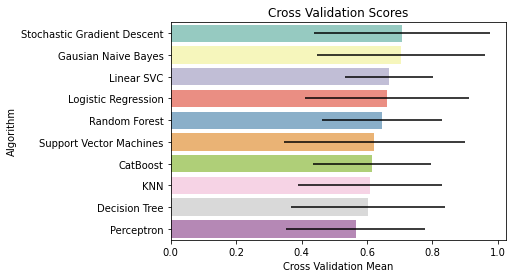

In [20]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

## 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [21]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.44745762711864406, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6143344709897611, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6245733788395904, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.46440677966101696, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6723549488054608, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6279863481228669, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ..........................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6143344709897611, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6143344709897611, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6135593220338983, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6143344709897611, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.6143344709897611, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.44745762711864406, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6177474402730375, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ......

[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.6621160409556314, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.6245733788395904, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.44745762711864406, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.6621160409556314, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.6279863481228669, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [22]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best estimator:  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [23]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.18

In [24]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.6347931562819202

Our mean cross validation score improved slightly.

In [26]:
# Survival predictions by support vector classifier

Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
len(Y_pred)

418

In [28]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [29]:
ss.shape

(418, 2)

In [30]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,951,1
1,966,1
2,1004,1
3,1033,1
4,1048,1


In [ ]:
# Create and save csv file 

submit.to_csv("../data/final/mdp_titanic_submission.csv", index = False)

# 8. Possible extensions to improve model accuracy

1. Analyse ticket and cabin features
    - Do these features help predict passenger survival?
    - If yes, consider including them in the training set instead of dropping
2. Come up with alternative features in feature engineering
    - Is there any other features you can potentially create from existing features in the dataset
3. Remove features that are less important
    - Does removing features help reduce overfitting in the model?
4. Ensemble modelling
    - This is a more advanced technique whereby you combine prediction results from multiple machine learning models

# 9. Conclusion

You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!

My platforms: 
- [Facebook](https://www.facebook.com/chongjason914)
- [Instagram](https://www.instagram.com/chongjason914)
- [Twitter](https://www.twitter.com/chongjason914)
- [LinkedIn](https://www.linkedin.com/in/chongjason914)
- [YouTube](https://www.youtube.com/channel/UCQXiCnjatxiAKgWjoUlM-Xg?view_as=subscriber)
- [Medium](https://www.medium.com/@chongjason)